<a href="https://colab.research.google.com/github/RealebohaRamphielo/Machine-Learning-and-Pattern-Recognition/blob/main/B9AI102_CAII_10622234.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Realeboha Raymond Ramphielo `10622234`**
## ***B9AI102 CA II***

### Importing libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from math import sqrt
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.model_selection import cross_validate, RandomizedSearchCV
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import recall_score, accuracy_score, precision_score, mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor, StackingClassifier

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

### Importing the data

In [ ]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Dropping empty rows and other unneeded rows

In [ ]:
print(data.nunique(),'\n***********************\n')
print(data.info())
print(Counter(data['gender']))
print(Counter(data['stroke']))
data.drop('id', axis=1, inplace=True)
data.drop(data[data['gender']=='Other'].index, axis=0, inplace=True)
data = data
data['gender']

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64 
***********************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi      

0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: gender, Length: 5109, dtype: object

### Converting age from years to months

In [ ]:
print(data.info())
data['age(in months)'] = round(data['age']*12,0)
data.drop('age', axis=1, inplace=True)
data=data
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB
None


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age(in months)
0,Male,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,804.0
1,Female,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,732.0
2,Male,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,960.0
3,Female,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,588.0
4,Female,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,948.0
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,960.0
5106,Female,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,972.0
5107,Female,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,420.0
5108,Male,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,612.0


In [ ]:
cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
        'Residence_type', 'smoking_status', 'avg_glucose_level', 'bmi',
        'age(in months)', 'stroke']

data = data[cols]
data.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,avg_glucose_level,bmi,age(in months),stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,228.69,36.6,804.0,1
1,Female,0,0,Yes,Self-employed,Rural,never smoked,202.21,NaN,732.0,1
2,Male,0,1,Yes,Private,Rural,never smoked,105.92,32.5,960.0,1
3,Female,0,0,Yes,Private,Urban,smokes,171.23,34.4,588.0,1
4,Female,1,0,Yes,Self-employed,Rural,never smoked,174.12,24.0,948.0,1


### Shortening some responses

In [ ]:
for i in cols[0:7]:
  print(i,Counter(data[i]))

gender Counter({'Female': 2994, 'Male': 2115})
hypertension Counter({0: 4611, 1: 498})
heart_disease Counter({0: 4833, 1: 276})
ever_married Counter({'Yes': 3353, 'No': 1756})
work_type Counter({'Private': 2924, 'Self-employed': 819, 'children': 687, 'Govt_job': 657, 'Never_worked': 22})
Residence_type Counter({'Urban': 2596, 'Rural': 2513})
smoking_status Counter({'never smoked': 1892, 'Unknown': 1544, 'formerly smoked': 884, 'smokes': 789})


In [ ]:
labels = {'Female': 'F', 'Male': 'M', 'Yes': 1, 'No': 0, 'Private': 'Pr',
          'Self-employed': 'SE', 'children': 'Ch', 'Govt_job': 'GJ',
          'Never_worked': 'NW', 'Urban': 'U', 'Rural': 'R', 'never smoked': 'NS'
          , 'Unknown': 'Un', 'formerly smoked': 'FS', 'smokes': 'Sm'}

data.replace(to_replace=labels, inplace=True)
data.columns = [lab.lower() for lab in data.columns]
data=data
data.head()

,gender,hypertension,heart_disease,ever_married,work_type,residence_type,smoking_status,avg_glucose_level,bmi,age(in months),stroke
0,M,0,1,1,Pr,U,FS,228.69,36.6,804.0,1
1,F,0,0,1,SE,R,NS,202.21,NaN,732.0,1
2,M,0,1,1,Pr,R,NS,105.92,32.5,960.0,1
3,F,0,0,1,Pr,U,Sm,171.23,34.4,588.0,1
4,F,1,0,1,SE,R,NS,174.12,24.0,948.0,1


In [ ]:
new_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married',
            'work_type', 'residence_type', 'smoking_status',
            'avg_glucose_level', 'bmi',  'age(in months)']

for i in new_cols[0:7]:
  data[i] = pd.Categorical(data[i])

data['stroke'] = pd.Categorical(data['stroke'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5109 non-null   category
 1   hypertension       5109 non-null   category
 2   heart_disease      5109 non-null   category
 3   ever_married       5109 non-null   category
 4   work_type          5109 non-null   category
 5   residence_type     5109 non-null   category
 6   smoking_status     5109 non-null   category
 7   avg_glucose_level  5109 non-null   float64 
 8   bmi                4908 non-null   float64 
 9   age(in months)     5109 non-null   float64 
 10  stroke             5109 non-null   category
dtypes: category(8), float64(3)
memory usage: 200.7 KB


## Question 1

#### 1a

`Logistic regression` calculates the probability of a class (event) by: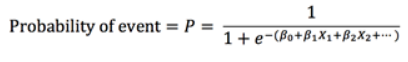

The SVR kernel method applies a non-linear transformation to data points before fitting by obtaining the inner product of the original data and running it through a kernel function for transformation.

`Support vector machine classifier linear kernel` uses the following function: 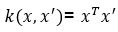

`Support vector machine classifier RBF kernel` uses the following function: 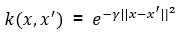
(**NB** $\gamma$ should be greater than zero)

`Decision tree classifier` uses either enthropy or gini to splits, they is given by: 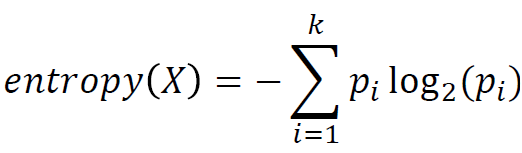

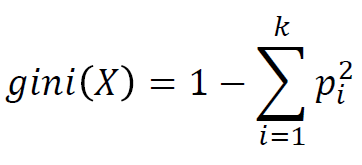

In both instances, p of *i* is the proportion of elements of class *i*

`Categorical Naive Bayes` is given by: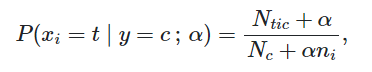

We have.............................................
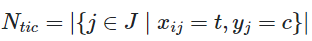
  
  And...............................................
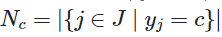

`Gaussian Naive Bayes` is given by: 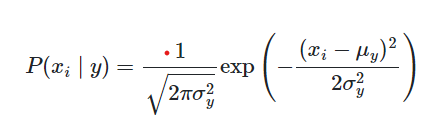


#### Defining the predictor and predicted variables

In [ ]:
x = data[new_cols]
y = data['stroke']

Counter({1: 249, 0: 4860})

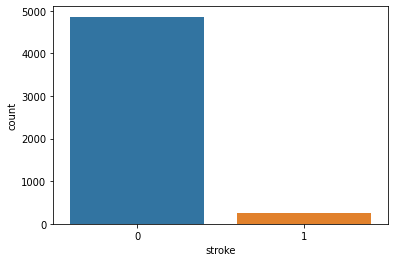

In [ ]:
sns.countplot(x=y)
Counter(y)

#### Encoding the categorical varaibles

In [ ]:
to_encode = ['gender', 'work_type', 'residence_type', 'smoking_status']
no_encode = ['hypertension', 'heart_disease', 'ever_married',
             'avg_glucose_level', 'bmi', 'age(in months)']

x_1 = x.drop(no_encode, axis=1)
x_1 = pd.get_dummies(x_1, drop_first=True)
x_2 = x.drop(to_encode, axis=1)
x = pd.concat([x_1, x_2], axis=1)

#### Imputating the missing values

In [ ]:
col_names = ['gender_M', 'work_type_GJ', 'work_type_NW', 'work_type_Pr',
              'work_type_SE', 'residence_type_U', 'smoking_status_NS',
              'smoking_status_Sm', 'smoking_status_Un', 'hypertension',
              'heart_disease', 'ever_married', 'avg_glucose_level', 'bmi',
              'age(in months)']
imputer = KNNImputer(n_neighbors=2)
x = imputer.fit_transform(x)
x = pd.DataFrame(x, columns=col_names)
x.info()
for i in col_names[0:-3]:
  x[i] = pd.Categorical(x[i])

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender_M           5109 non-null   float64
 1   work_type_GJ       5109 non-null   float64
 2   work_type_NW       5109 non-null   float64
 3   work_type_Pr       5109 non-null   float64
 4   work_type_SE       5109 non-null   float64
 5   residence_type_U   5109 non-null   float64
 6   smoking_status_NS  5109 non-null   float64
 7   smoking_status_Sm  5109 non-null   float64
 8   smoking_status_Un  5109 non-null   float64
 9   hypertension       5109 non-null   float64
 10  heart_disease      5109 non-null   float64
 11  ever_married       5109 non-null   float64
 12  avg_glucose_level  5109 non-null   float64
 13  bmi                5109 non-null   float64
 14  age(in months)     5109 non-null   float64
dtypes: float64(15)
memory usage: 598.8 KB
<class 'pandas.core.frame.DataFram

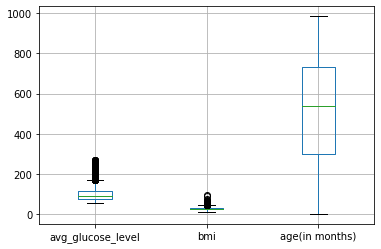

In [ ]:
x.iloc[:,-3:].boxplot()

### Model training function

In [ ]:
def modelTrain(mdl, x, y, sz=0.2, rs=1307, kn=5):
  minMax = MinMaxScaler()
  stdScaler = StandardScaler()
  sm = SMOTE(sampling_strategy='auto', k_neighbors=kn, random_state = rs)

  x = minMax.fit_transform(x)
  x_train, x_test, y_train, y_test = tts(x, y, test_size=sz, random_state=rs, shuffle=True, stratify=y)

  x_rsmp, y_rsmp = sm.fit_resample(x_train, y_train)

  mdl.fit(x_rsmp, y_rsmp)
  y_pred = mdl.predict(x_test)

  acc_scr = accuracy_score(y_test, y_pred)
  rcll_scr = recall_score(y_test, y_pred)
  prc_scr = precision_score(y_test, y_pred)


  return sz, acc_scr, rcll_scr, prc_scr

### Model definitions

In [ ]:
lr = LogisticRegression(fit_intercept=True)
svcl = SVC(kernel='linear', C=0.9, probability=True)
svcr = SVC(kernel='rbf', C=0.7, gamma='auto', probability=True)
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=4)
cnb = CategoricalNB(alpha=0.8)
gnb = GaussianNB()

In [ ]:
models = [lr, svcl, svcr, dtc, cnb, gnb]
test_sizes = [0.2, 0.25, 0.29, 0.33, 0.36, 0.41]

### 1b

#### Base model testing

In [ ]:
scr1 = modelTrain(lr, x, y, sz=0.2, kn=1)
scr1

(0.2, 0.738747553816047, 0.76, 0.1296928327645051)

In [ ]:
base_models = {'Logistic Regression':lr, 'SVC Linear Kernel':svcl, 'SVC RBF Kernel':\
          svcr,'Decision Tree Classifier':dtc, 'Categorical Naive Bayes':cnb,\
          'Gaussian Naive Bayes':gnb}
test_sizes = [0.15, 0.2, 0.25, 0.30, 0.35, 0.40, 0.45]

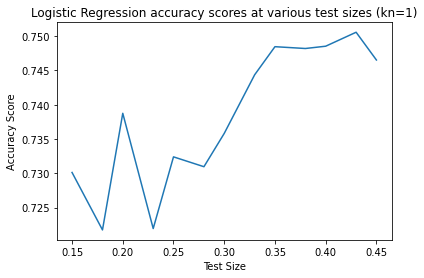

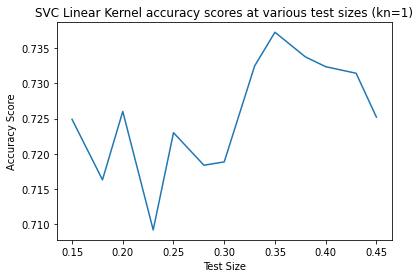

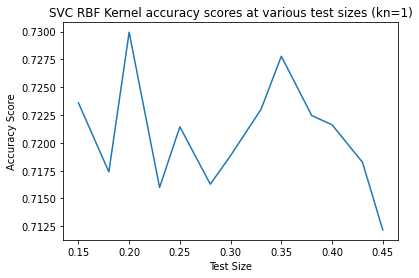

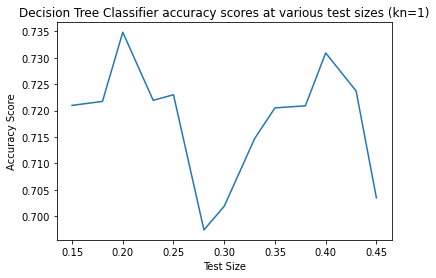

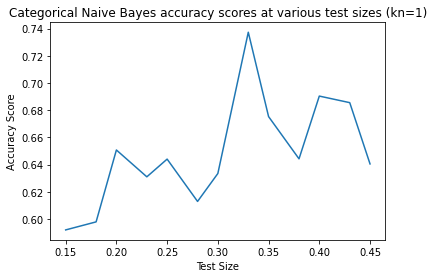

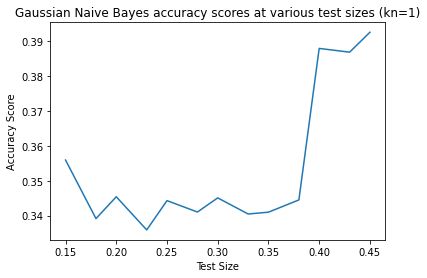

In [ ]:
for the_name, the_model in base_models.items():
  test_sizes = [0.15, 0.18, 0.2, 0.23, 0.25, 0.28, 0.30, 0.33, 0.35, 0.38, 0.40, 0.43, 0.45]
  acc_scores = []
  heading = f"{the_name} accuracy scores at various test sizes (kn=1)"
  for the_size in test_sizes:
    the_data = modelTrain(the_model, x, y, sz=the_size, kn=1)
    acc_scores.append(the_data[1])
  fig, ax = plt.subplots()
  ax.plot(test_sizes,acc_scores)
  ax.set(xlabel='Test Size', ylabel='Accuracy Score', title=heading)
  plt.show()

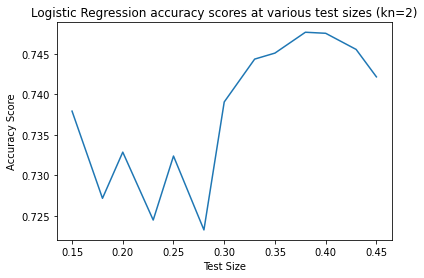

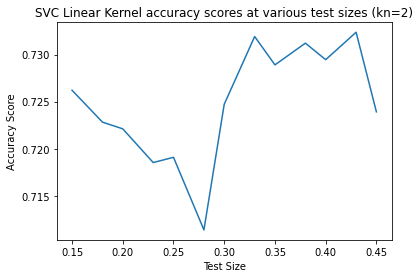

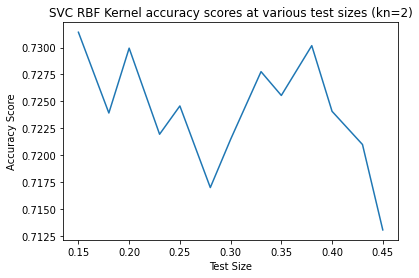

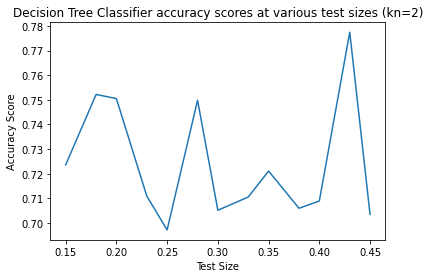

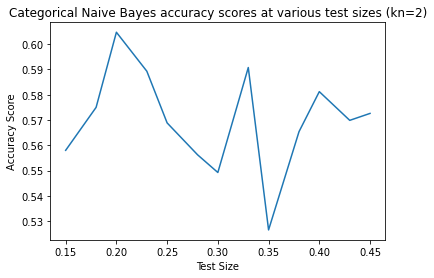

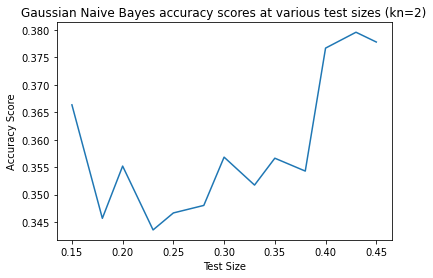

In [ ]:
for the_name, the_model in base_models.items():
  test_sizes = [0.15, 0.18, 0.2, 0.23, 0.25, 0.28, 0.30, 0.33, 0.35, 0.38, 0.40, 0.43, 0.45]
  acc_scores = []
  heading = f"{the_name} accuracy scores at various test sizes (kn=2)"
  for the_size in test_sizes:
    the_data = modelTrain(the_model, x, y, sz=the_size, kn=2)
    acc_scores.append(the_data[1])
  fig, ax = plt.subplots()
  ax.plot(test_sizes,acc_scores)
  ax.set(xlabel='Test Size', ylabel='Accuracy Score', title=heading)
  plt.show()

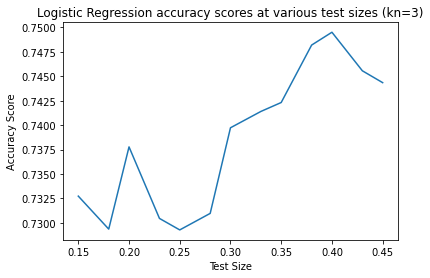

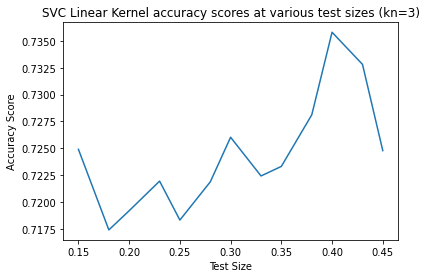

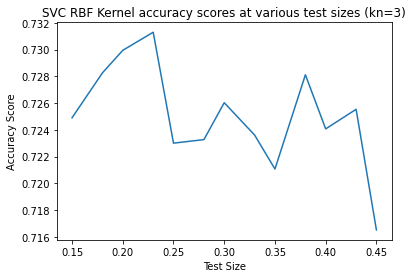

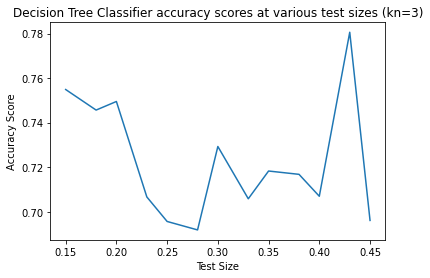

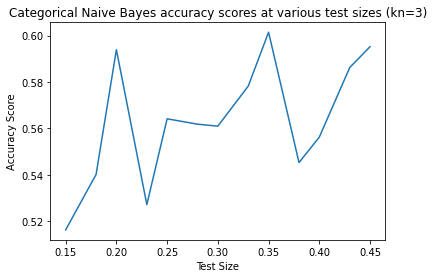

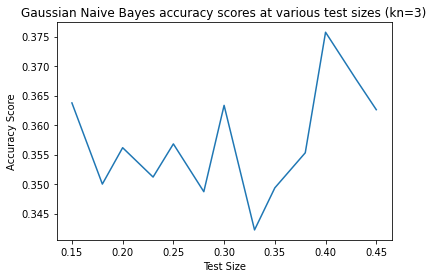

In [ ]:
for the_name, the_model in base_models.items():
  test_sizes = [0.15, 0.18, 0.2, 0.23, 0.25, 0.28, 0.30, 0.33, 0.35, 0.38, 0.40, 0.43, 0.45]
  acc_scores = []
  heading = f"{the_name} accuracy scores at various test sizes (kn=3)"
  for the_size in test_sizes:
    the_data = modelTrain(the_model, x, y, sz=the_size, kn=3)
    acc_scores.append(the_data[1])
  fig, ax = plt.subplots()
  ax.plot(test_sizes,acc_scores)
  ax.set(xlabel='Test Size', ylabel='Accuracy Score', title=heading)
  plt.show()

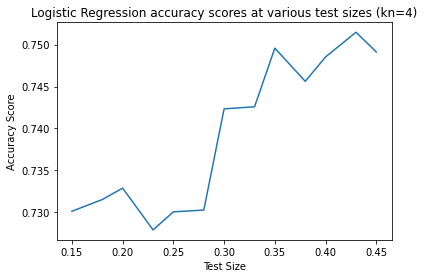

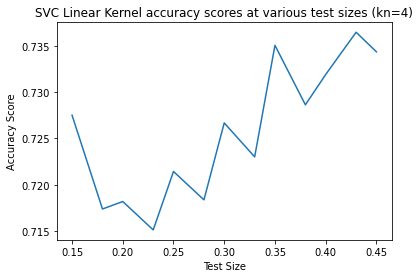

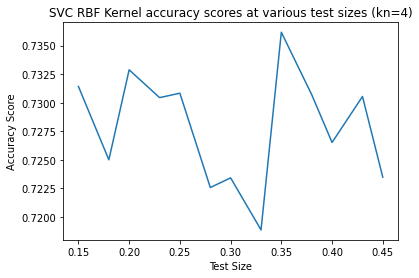

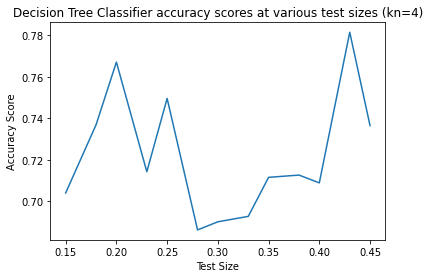

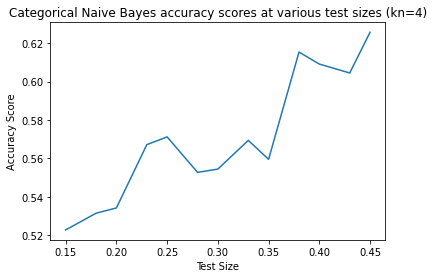

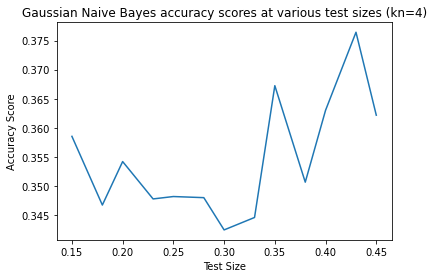

In [ ]:
for the_name, the_model in base_models.items():
  test_sizes = [0.15, 0.18, 0.2, 0.23, 0.25, 0.28, 0.30, 0.33, 0.35, 0.38, 0.40, 0.43, 0.45]
  acc_scores = []
  heading = f"{the_name} accuracy scores at various test sizes (kn=4)"
  for the_size in test_sizes:
    the_data = modelTrain(the_model, x, y, sz=the_size, kn=4)
    acc_scores.append(the_data[1])
  fig, ax = plt.subplots()
  ax.plot(test_sizes,acc_scores)
  ax.set(xlabel='Test Size', ylabel='Accuracy Score', title=heading)
  plt.show()

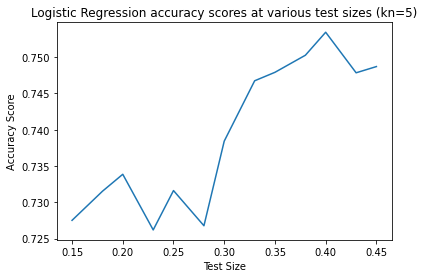

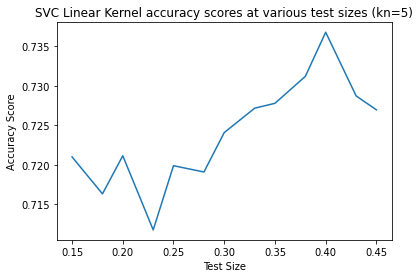

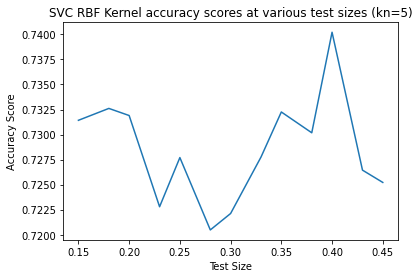

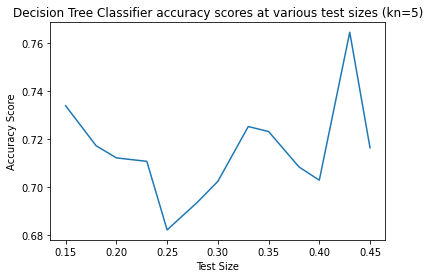

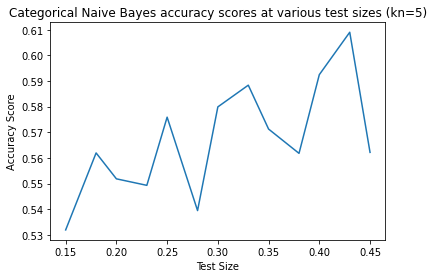

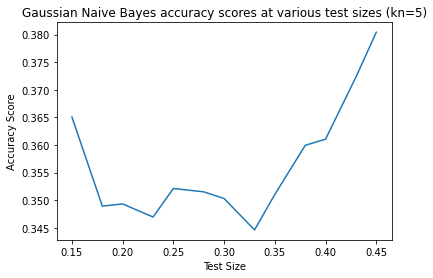

In [ ]:
for the_name, the_model in base_models.items():
  test_sizes = [0.15, 0.18, 0.2, 0.23, 0.25, 0.28, 0.30, 0.33, 0.35, 0.38, 0.40, 0.43, 0.45]
  acc_scores = []
  heading = f"{the_name} accuracy scores at various test sizes (kn=5)"
  for the_size in test_sizes:
    the_data = modelTrain(the_model, x, y, sz=the_size, kn=5)
    acc_scores.append(the_data[1])
  fig, ax = plt.subplots()
  ax.plot(test_sizes,acc_scores)
  ax.set(xlabel='Test Size', ylabel='Accuracy Score', title=heading)
  plt.show()

#### Insights

<p align=justify>
The data needs balancing because one class of the predicated varaible is more than 10 times more than the other class. It is for this reason that the six models are tested at various nearest neighbors used to define the neighborhood of samples to use to generate the synthetic samples; kn. The best <i>kn</i> value is <i>4</i> because most models reach their peak accuracy scores at this <i>kn=4</i>.<br></br>
Logistic regression performs better as the test size increases and train size decreases, the model achieves its best accuracy score when test size is 43%. The linear SVC kernel gradually improves in performance as the test size increases, on the other hand, the RBF kernel does not seem to follow a certain pattern; as the test size changes, the performance is somewhat random. The linear kernel of the SVC peaks at 43% test size, while the radial basis function kernel peaks at 35% test size. The decision tree classifier behaves similarly to the SVR RBF kernel in that the performance is random as the train size changes, it peaks at <i><b>test size = 43%</b></i>. The Categorical Naive Bayes model clearly improves in accuracy as the train size decreases, it peaks when the train size is 55%. Before hitting test size of 30%, the Gaussian Naive Bayes accuracy score decreases as the test size, the accuracy is then somewhat random as test size increases, and the peak accuracy score is reached when the test size is 43%.  
</p>

### 1c

#### Bagging the models

In [ ]:
#the function runs the Monte Carlo runds

def mc_validator(mdl, the_sz, x, y):
  scores = []
  for i in range(100):
    model_data = modelTrain(mdl, x, y , sz=the_sz, kn=4, rs=i)
    scores.append(model_data[1])
  return scores

In [ ]:
bag_1 = BaggingClassifier(base_estimator=lr, n_estimators=100, max_features=0.85, max_samples=0.85)
bag_2 = BaggingClassifier(base_estimator=svcl, n_estimators=100, max_features=0.85, max_samples=0.85)
bag_3 = BaggingClassifier(base_estimator=svcr, n_estimators=100, max_features=0.85, max_samples=0.85)
bag_4 = BaggingClassifier(base_estimator=dtc, n_estimators=100, max_features=0.85, max_samples=0.85)
bag_5 = BaggingClassifier(base_estimator=gnb, n_estimators=100, max_features=0.85, max_samples=0.85)
bag_6 = BaggingClassifier(base_estimator=cnb, n_estimators=100, max_features=0.85, max_samples=0.85)


bag_models = {'Logistic Regression':(bag_1,0.43), 'SVC Linear':(bag_2,0.43),
              'SVC RBF':(bag_3,0.35), 'Decision Tree':(bag_4,0.43),
              'Gaussian NB':(bag_5, 0.43)}

bag_scores={}

In [ ]:
for model_name, model in bag_models.items():
  score = mc_validator(mdl=model[0], the_sz=model[1],x=x,y=y)
  bag_scores[model_name] = score

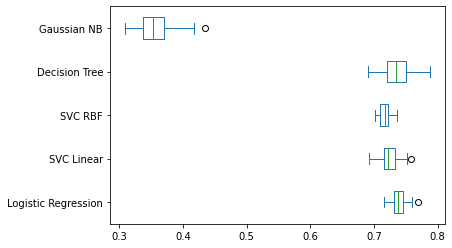

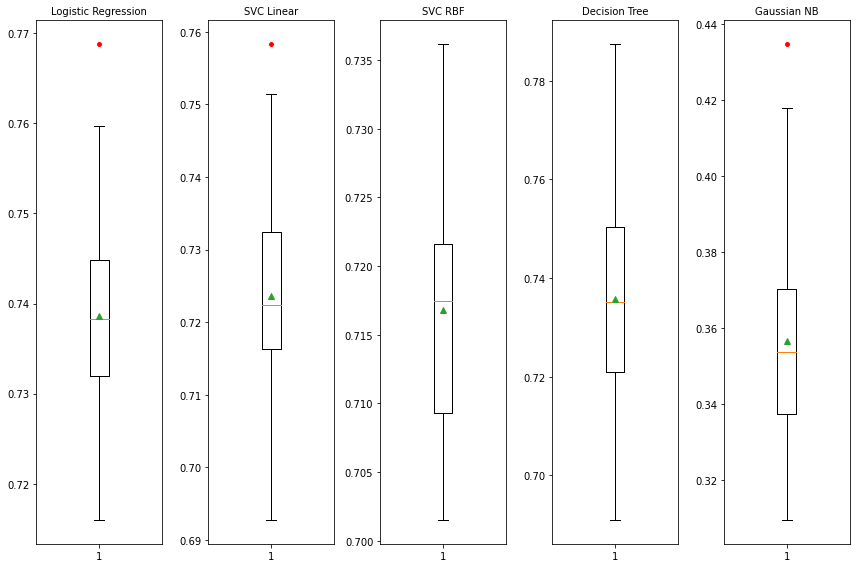

In [ ]:
bag_df = pd.DataFrame(bag_scores)
bag_df.plot(kind='box', vert=False)

#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(bag_df.columns), figsize=(12,8))

for i, ax in enumerate(axs.flat):
    ax.boxplot(bag_df.iloc[:,i], flierprops=red_circle, showmeans=True)
    ax.set_title(bag_df.columns[i], fontsize=10)
    ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()

#### Boosting the models

In [ ]:
def mc_validator_boost(mdl, the_sz, x, y):
  scores = []
  for i in range(100):
    model_data = modelTrain(mdl, x, y , sz=the_sz, kn=4)
    scores.append(model_data[1])
  return scores

In [ ]:
ada_1 = AdaBoostClassifier(base_estimator=lr, n_estimators=10)
ada_2 = AdaBoostClassifier(base_estimator=svcl, n_estimators=10)
ada_3 = AdaBoostClassifier(base_estimator=svcr, n_estimators=10)
ada_4 = AdaBoostClassifier(base_estimator=dtc, n_estimators=10)
ada_5 = AdaBoostClassifier(base_estimator=gnb, n_estimators=10)
ada_6 = AdaBoostClassifier(base_estimator=cnb, n_estimators=10)

boost_models = {'Logistic Regression':(ada_1,0.43),'Decision Tree':(ada_4,0.43),
              'Gaussian NB':(ada_5, 0.43), 'Categorical NB':(ada_6, 0.45)}

boost_scores = {}

In [ ]:
for model_name, model in boost_models.items():
  score = mc_validator_boost(mdl=model[0], the_sz=model[1],x=x,y=y)
  boost_scores[model_name] = score

In [ ]:
score = mc_validator_boost(mdl=ada_2, the_sz=0.43,x=x,y=y)
boost_scores['SVC Linear'] = score

In [ ]:
score = mc_validator_boost(mdl=ada_3, the_sz=0.35,x=x,y=y)
boost_scores['SVC RBF'] = score

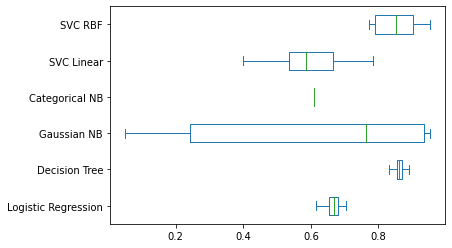

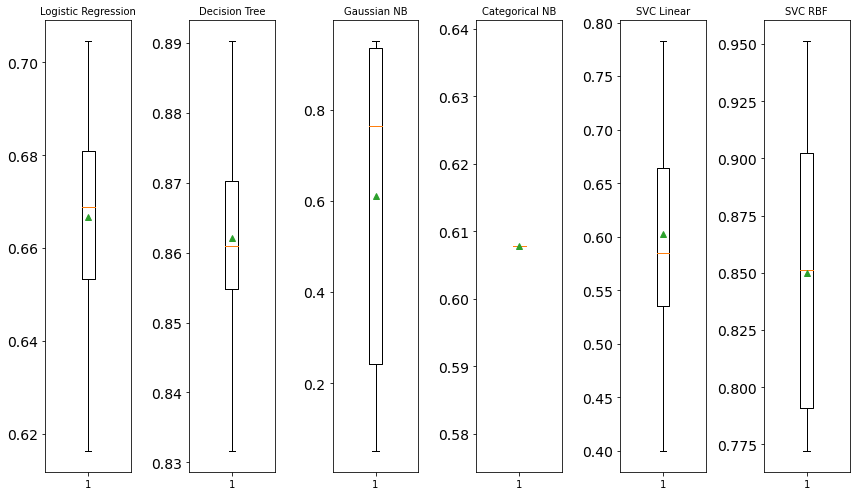

In [ ]:
boost_df = pd.DataFrame(boost_scores)
boost_df.plot(kind='box', vert=False)
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(boost_df.columns), figsize=(12,7))

for i, ax in enumerate(axs.flat):
    ax.boxplot(boost_df.iloc[:,i], flierprops=red_circle, showmeans=True)
    ax.set_title(boost_df.columns[i], fontsize=10)
    ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()

#### Stacking

In [ ]:
def mc_validator_stack(mdl, x, y):
  scores = []
  for i in range(100):
    model_data = modelTrain(mdl, x, y , sz=0.2, kn=2, rs=i)
    scores.append(model_data[1])
  return scores

In [ ]:
base_1 = [('Logistic Regression', lr), ('Decision Tree', dtc)]
base_2 = [('Logistic Regression', lr), ('Decision Tree', dtc), ('Gaussian NB',gnb)]

stack_1 = StackingClassifier(estimators=base_1, final_estimator=ada_5, cv=None)
stack_2 = StackingClassifier(estimators=base_2, final_estimator=bag_1, cv=None)
stack_3 = StackingClassifier(estimators=base_1, final_estimator=lr, cv=None)
stack_4 = StackingClassifier(estimators=base_1, final_estimator=dtc, cv=None)
stack_5 = StackingClassifier(estimators=base_2, final_estimator=gnb, cv=None)

stacks = {'Stack Three':stack_3, 'Stack Four':stack_4, 'Stack Five':stack_5}

stack_scores={}

In [ ]:
for model_name, model in stacks.items():
  score = mc_validator_stack(mdl=model,x=x,y=y)
  stack_scores[model_name] = score

In [ ]:
score = mc_validator_stack(mdl=stack_1,x=x,y=y)
stack_scores['Stack One'] = score

In [ ]:
score = mc_validator_stack(mdl=stack_2,x=x,y=y)
stack_scores['Stack Two'] = score

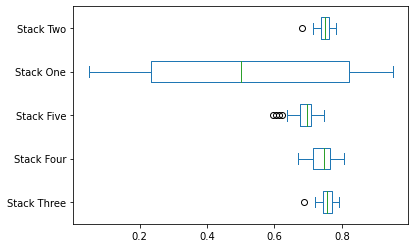

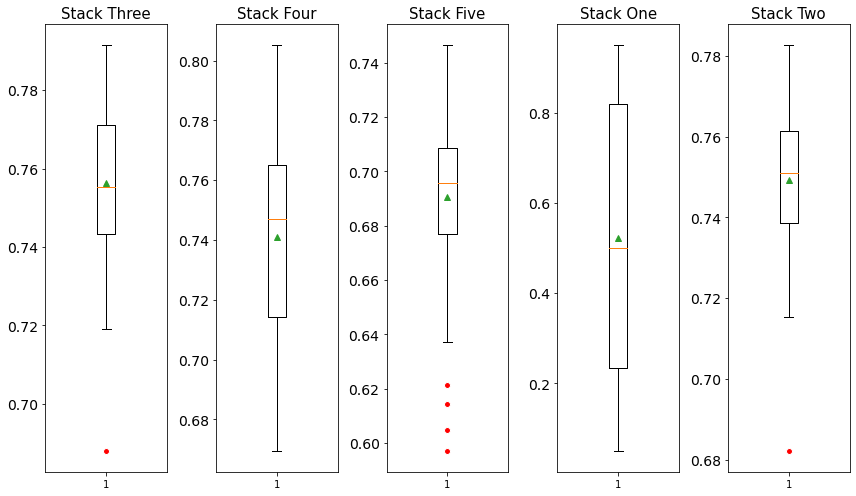

In [ ]:
stack_df = pd.DataFrame(stack_scores)
stack_df.plot(kind='box', vert=False)

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(stack_df.columns), figsize=(12,7))

for i, ax in enumerate(axs.flat):
    ax.boxplot(stack_df.iloc[:,i], flierprops=red_circle, showmeans=True)
    ax.set_title(stack_df.columns[i], fontsize=15)
    ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()

#### Conclusion

<p align=justify>
The bagged Decision Tree classifier is the best performing bagged model, it has a reasonable range, it has the highest accuracy score peak, and neither of its scores are outliers when run through 100 Monte Carlo runs.<br></br>
Of the boosted classifiers, the boosted Decision Tree classifier performs the best. The SVC RBF kernel has the best overall accuracy but its higher range works against it. Furthermore, it is computationally far more expensive to run the SVC RBF kernel model than its counterparts.
<br></br>
The best performing stacking classifier is stack 3, it comprises the Logistic Regression and Decision Tree classifier models as the base models and the Logistic Regression model as the final estimator. It has the lowest range and highest peak accuracy of all the stacking classifiers. It has an outlier, however, this outlier is the highest low score of all the stacking classifiers.
</p>

### 1d

<p align=justify>
The best performing classifier is the boosted Decision Tree classifier (Adapting Boosting classifier with Decision Tree classifier at the base model).<br></br>
Due to the fact that the input parameters are not simultaneously optimized, Adaboost is less prone to overfitting. Using Adaboost, poor classifiers' accuracy can be increased in classification.<br></br>
AdaBoost employs a technique for boosting that gradually learns. As a result, AdaBoost examples require high-quality data. Furthermore, before using the data, outliers must be removed because AdaBoost is extremely sensitive to outliers and noise in the data. In comparison to some boosting algorithms, it is also a lot slower.
</p>

<p align=justify>

</p>

## Question 2

### Defining the dependant and independant variables

In [ ]:
x_regression = data.drop('avg_glucose_level', axis = 1)
x_regression = x_regression[['gender', 'hypertension', 'heart_disease',
                             'ever_married', 'work_type','residence_type',
                             'smoking_status', 'stroke', 'bmi', 'age(in months)']]

x_regression.head()
x_regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   gender          5109 non-null   category
 1   hypertension    5109 non-null   category
 2   heart_disease   5109 non-null   category
 3   ever_married    5109 non-null   category
 4   work_type       5109 non-null   category
 5   residence_type  5109 non-null   category
 6   smoking_status  5109 non-null   category
 7   stroke          5109 non-null   category
 8   bmi             4908 non-null   float64 
 9   age(in months)  5109 non-null   float64 
dtypes: category(8), float64(2)
memory usage: 160.8 KB


In [ ]:
y_regression = data['avg_glucose_level']
y_regression.head(2)

0    228.69
1    202.21
Name: avg_glucose_level, dtype: float64

### Encoding and imputating

In [ ]:
to_encode = ['gender', 'work_type', 'residence_type', 'smoking_status']
no_encode = ['hypertension', 'heart_disease', 'ever_married',
             'stroke', 'bmi', 'age(in months)']

x_one = x_regression.drop(no_encode, axis=1)
x_one = pd.get_dummies(x_one, drop_first=True)
x_two = x_regression.drop(to_encode, axis=1)
x_regression = pd.concat([x_one, x_two], axis=1)

col_regression = x_regression.columns

imputer_regression = KNNImputer(n_neighbors=1)
x_regression = imputer_regression.fit_transform(x_regression)
x_regression = pd.DataFrame(x_regression, columns=col_regression)
x_regression.info()
for i in col_regression[0:-2]:
  x_regression[i] = pd.Categorical(x_regression[i])

x_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender_M           5109 non-null   float64
 1   work_type_GJ       5109 non-null   float64
 2   work_type_NW       5109 non-null   float64
 3   work_type_Pr       5109 non-null   float64
 4   work_type_SE       5109 non-null   float64
 5   residence_type_U   5109 non-null   float64
 6   smoking_status_NS  5109 non-null   float64
 7   smoking_status_Sm  5109 non-null   float64
 8   smoking_status_Un  5109 non-null   float64
 9   hypertension       5109 non-null   float64
 10  heart_disease      5109 non-null   float64
 11  ever_married       5109 non-null   float64
 12  stroke             5109 non-null   float64
 13  bmi                5109 non-null   float64
 14  age(in months)     5109 non-null   float64
dtypes: float64(15)
memory usage: 598.8 KB
<class 'pandas.core.frame.DataFram

### Base models

In [ ]:
svrl = SVR(kernel='linear')
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
rid_reg = Ridge()

In [ ]:
dists = {"criterion":['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
         "n_estimators":[50, 100, 200], "max_depth": [2,4,6,8, None],
         "max_features":['auto', 'log2', 'sqrt'], 'min_samples_split':range(2,10)}

model_1 = RandomizedSearchCV(rfr, dists, random_state=1307, scoring='neg_root_mean_squared_error', cv=3)
search_1 = model_1.fit(x_regression, y_regression)
search_1.best_params_

{'n_estimators': 200,
 'min_samples_split': 3,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'squared_error'}

In [ ]:
dists = {"criterion":['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
         "splitter":['random', 'best'], "max_depth": [1,2,3,4,6,8, None],
         "max_features":['auto', 'log2', 'sqrt', None], 'min_samples_split':range(2,12)}

model_2 = RandomizedSearchCV(dtr, dists, random_state=1307, scoring='neg_root_mean_squared_error', cv=3)
search_2 = model_2.fit(x_regression, y_regression)
search_2.best_params_

{'splitter': 'best',
 'min_samples_split': 4,
 'max_features': 'auto',
 'max_depth': 4,
 'criterion': 'squared_error'}

In [ ]:
dists = {'fit_intercept':[True, False],'alpha':[0.5, 0.8, 1, 2, 5, 10],
         'solver':['auto', 'svd', 'cholesky','lsqr', 'sparse_cg', 'sag','saga', 'lbfgs']}

model_3 = RandomizedSearchCV(rid_reg, dists, random_state=1307, scoring='neg_root_mean_squared_error', cv=3)
search_3 = model_3.fit(x_regression, y_regression)
search_3.best_params_


{'solver': 'svd', 'fit_intercept': True, 'alpha': 2}

In [ ]:
dists = {'C':[0,2, 0.5, 0.8, 1, 1.5, 2, 5, 10]}

model_4 = RandomizedSearchCV(svrl, dists, random_state=1307, scoring='neg_root_mean_squared_error', cv=3)
search_4 = model_4.fit(x_regression, y_regression)
search_4.best_params_


{'C': 10}

In [ ]:
dists = {'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
         'learning_rate':[0.1, 0.5, 1.0, 1.5, 2,5], 'n_estimators':[100, 200,500],
         "criterion":['squared_error', 'friedman_mse'],"max_depth": [2,4,6,8, None],
         "max_features":['auto', 'log2', 'sqrt'], 'min_samples_split':range(2,10)}

model_5 = RandomizedSearchCV(GradientBoostingRegressor(), dists, random_state=1307, scoring='neg_root_mean_squared_error', cv=3)
search_5 = model_5.fit(x_regression, y_regression)
search_5.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'max_features': 'auto',
 'max_depth': 4,
 'loss': 'squared_error',
 'learning_rate': 0.5,
 'criterion': 'squared_error'}

### Best base models

In [ ]:
rfr = RandomForestRegressor(n_estimators=200, min_samples_split=3, max_features='log2',max_depth=8, criterion='squared_error')
dtr = DecisionTreeRegressor(splitter='best', min_samples_split=4, max_features='auto', max_depth=4, criterion='squared_error')
rid_reg = Ridge(fit_intercept=True, solver='svd', alpha=2)
svrl = SVR(kernel='linear', C=10)
linReg = LinearRegression(fit_intercept=True)
g_boost = GradientBoostingRegressor(n_estimators=100, min_samples_split=8,
                                   max_features='auto', max_depth=4, loss='squared_error',
                                   learning_rate=0.5, criterion='squared_error')

### Training function

In [ ]:
def regTrain(mdl, x, y, sz=0.2, rs=1307, fol=5):
  stdScaler = StandardScaler()
  x = stdScaler.fit_transform(x)

  x_train, x_test, y_train, y_test = tts(x, y, test_size=sz, shuffle=True, random_state=rs)

  mdl.fit(x_train, y_train)
  y_pred = mdl.predict(x_test)

  rmse = -sqrt(mean_squared_error(y_pred,y_test))

  val_scores = cross_val_score(mdl, x, y, cv=fol, scoring='neg_root_mean_squared_error')
  val_scores.std()

  return rmse, val_scores, val_scores.std()

### Bagging

In [ ]:
reg_bag_1 = BaggingRegressor(base_estimator=linReg, n_estimators=70, max_features=0.85, max_samples=0.75)
reg_bag_2 = BaggingRegressor(base_estimator=svrl, n_estimators=70, max_features=0.85, max_samples=0.75)
reg_bag_3 = BaggingRegressor(base_estimator=rid_reg, n_estimators=70, max_features=0.85, max_samples=0.75)
reg_bag_4 = BaggingRegressor(base_estimator=dtr, n_estimators=70, max_features=0.85, max_samples=0.75)
reg_bag_5 = BaggingRegressor(base_estimator=rfr, n_estimators=70, max_features=0.85, max_samples=0.75)

bag_reg = { 'Random Forest':rfr, 'Linear Regression':reg_bag_1,
           'SVR Linear Kernel':reg_bag_2, 'Ridge':reg_bag_3,
           'Decision Tree':reg_bag_4, 'Bagged Random forest':reg_bag_5}

scores_bag = {}
mean_scores_bag = {}
std_scores_bag = {}

In [ ]:
for name, model in bag_reg.items():
  scores = regTrain(model, x_regression, y_regression, fol=6)
  scores_bag[name] = scores[0]
  mean_scores_bag[name] = scores[1]
  std_scores_bag[name] = scores[2]

In [ ]:
bag_model_names = [x for x in scores_bag.keys()]
bag_rmse = [z for z in scores_bag.values()]
mean_bag = [a.mean() for a in mean_scores_bag.values()]
std_bag = [b for b in std_scores_bag.values()]

[Text(0, 0.5, 'Neg RMSE'),
 Text(0.5, 0, 'Model'),
 Text(0.5, 1.0, 'Neg RMSE for bagging models')]

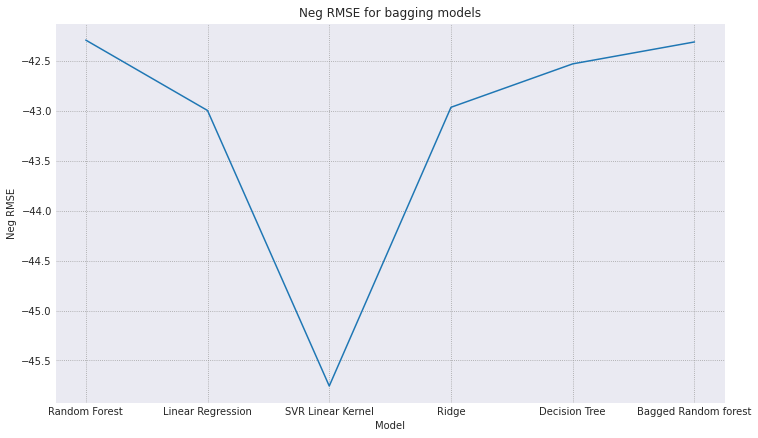

In [ ]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(12,7))
sns.lineplot(x=bag_model_names, y=bag_rmse).set(title="Neg RMSE for bagging models", xlabel='Model', ylabel='Neg RMSE')

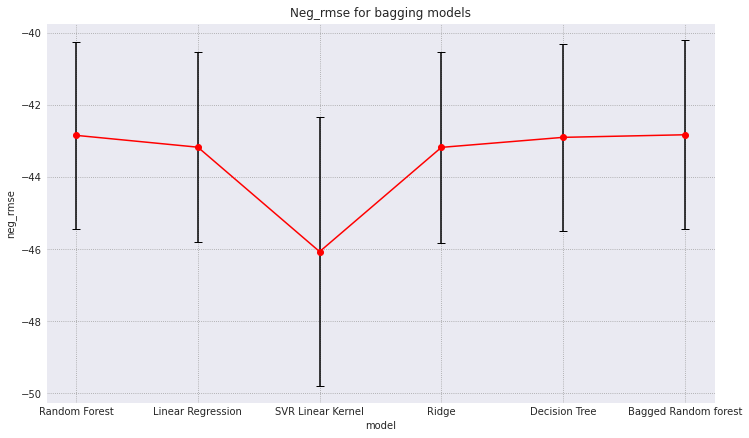

In [ ]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(12,7))
plt.errorbar(bag_model_names, mean_bag, yerr=std_bag,c='red', fmt='-o', capsize=4, ecolor='black')
plt.ylabel('neg_rmse'); plt.xlabel('model'); plt.title('Neg_rmse for bagging models')
plt.show()

### Boosting

In [ ]:
boost_1 = AdaBoostRegressor(base_estimator=dtr, n_estimators=100)
boost_2 = AdaBoostRegressor(base_estimator=linReg, n_estimators=100)
boost_3 = AdaBoostRegressor(base_estimator=rid_reg, n_estimators=100)
boost_4 = AdaBoostRegressor(base_estimator=svrl, n_estimators=100)
boost_5 = AdaBoostRegressor(base_estimator=g_boost, n_estimators=100)

boost_reg = {'Gradient Boost':g_boost, 'Decision Tree':boost_1,
             'Linear Regression':boost_2,'Ridge':boost_3,
             'SVR Linear Kernel':boost_4, 'Boosted Gradient Boost':boost_5}

scores_boost = {}
mean_scores_boost = {}
std_scores_boost = {}

In [ ]:
for name, model in boost_reg.items():
  scores = regTrain(model, x_regression, y_regression, fol=5)
  scores_boost[name] = scores[0]
  mean_scores_boost[name] = scores[1]
  std_scores_boost[name] = scores[2]

In [ ]:
boost_model_names = [x for x in scores_boost.keys()]
boost_rmse = [z for z in scores_boost.values()]
mean_boost = [a.mean() for a in mean_scores_boost.values()]
std_boost = [b for b in std_scores_boost.values()]

[Text(0, 0.5, 'Neg RMSE'),
 Text(0.5, 0, 'Model'),
 Text(0.5, 1.0, 'Neg RMSE for boosting models')]

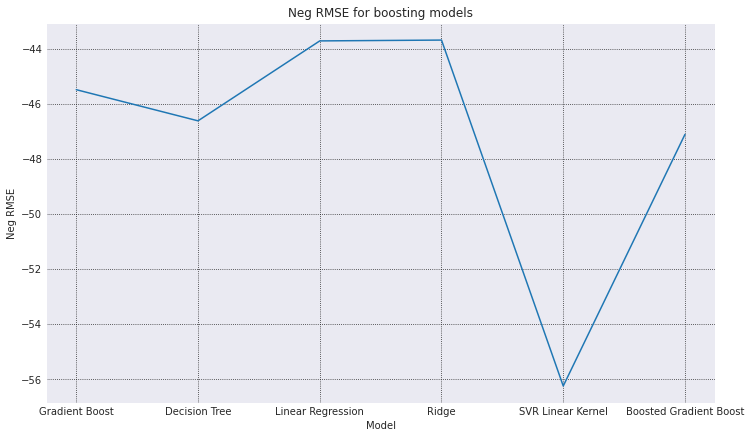

In [ ]:
sns.set_style("darkgrid", {"grid.color": ".1", "grid.linestyle": ":"})
plt.figure(figsize=(12,7))
sns.lineplot(x=boost_model_names, y=boost_rmse).set(title="Neg RMSE for boosting models", xlabel='Model', ylabel='Neg RMSE')

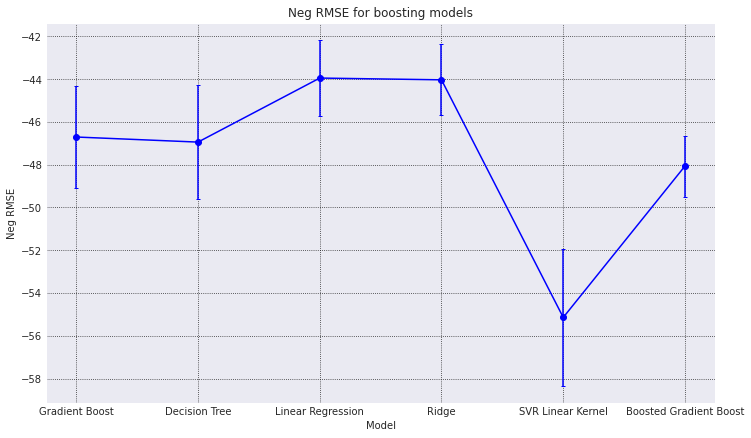

In [ ]:
sns.set_style("darkgrid", {"grid.color": ".1", "grid.linestyle": ":"})
plt.figure(figsize=(12,7))
plt.errorbar(boost_model_names, mean_boost, yerr=std_boost,c='blue', fmt='-o', capsize=2, ecolor='blue')
plt.ylabel('Neg RMSE'); plt.xlabel('Model'); plt.title('Neg RMSE for boosting models')
plt.show()

### Stacking

In [ ]:
reg_base_1 = [('Decision Tree', dtr), ('Linear Regression', linReg)]
reg_base_2 = [('Random Forest', rfr), ('Ridge Regression', rid_reg), ('Linear Regression', linReg)]
reg_base_3 = [('Random Forest', rfr), ('SVR Linear Kernel', svrl), ('Gradient Boost', g_boost)]

reg_stack_1 = StackingRegressor(estimators=reg_base_1, final_estimator=rfr, cv=5)
reg_stack_2 = StackingRegressor(estimators=reg_base_2, final_estimator=linReg, cv=5)
reg_stack_3 = StackingRegressor(estimators=reg_base_3, final_estimator=dtr, cv=5)
reg_stack_4 = StackingRegressor(estimators=reg_base_2, final_estimator=rfr, cv=5)
reg_stack_5 = StackingRegressor(estimators=reg_base_1, final_estimator=rid_reg, cv=5)
reg_stack_6 = StackingRegressor(estimators=reg_base_3, final_estimator=g_boost, cv=5)

stack_reg = {'Stack 1': reg_stack_1, 'Stack 2': reg_stack_2, 'Stack 3': reg_stack_3,
             'Stack 4': reg_stack_4, 'Stack 5': reg_stack_5, 'Stack 6': reg_stack_6}

scores_stack = {}
mean_scores_stack = {}
std_scores_stack = {}

In [ ]:
for name, model in stack_reg.items():
  scores = regTrain(model, x_regression, y_regression, fol=5)
  scores_stack[name] = scores[0]
  mean_scores_stack[name] = scores[1]
  std_scores_stack[name] = scores[2]

In [ ]:
stack_model_names = [x for x in scores_stack.keys()]
stack_rmse = [z for z in scores_stack.values()]
mean_stack = [a.mean() for a in mean_scores_stack.values()]
std_stack = [b for b in std_scores_stack.values()]

[Text(0, 0.5, 'Neg RMSE'),
 Text(0.5, 0, 'Model'),
 Text(0.5, 1.0, 'Neg RMSE for stacking models')]

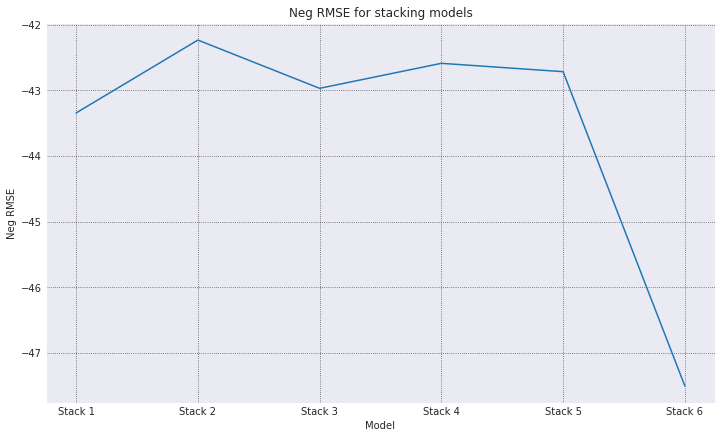

In [ ]:
sns.set_style("darkgrid", {"grid.color": ".3", "grid.linestyle": ":"})
plt.figure(figsize=(12,7))
sns.lineplot(x=stack_model_names, y=stack_rmse).set(title="Neg RMSE for stacking models", xlabel='Model', ylabel='Neg RMSE')

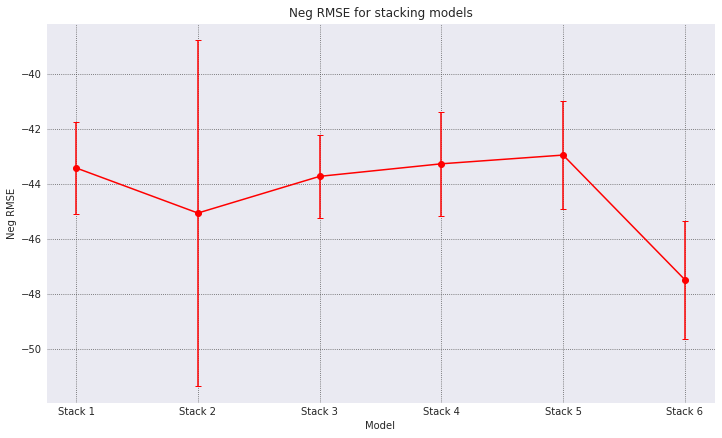

In [ ]:
sns.set_style("darkgrid", {"grid.color": ".3", "grid.linestyle": ":"})
plt.figure(figsize=(12,7))
plt.errorbar(stack_model_names, mean_stack, yerr=std_stack,c='red', fmt='-o', capsize=3, ecolor='red')
plt.ylabel('Neg RMSE'); plt.xlabel('Model'); plt.title('Neg RMSE for stacking models')
plt.show()

### Conclusion

<p align=justify>
Throughout the three ensemble methods (Bagging, Boosting, Stacking), the regression models are scored on the negative root mean square error; <i>-rmse</i>.
<br></br>
In the bagging approach, the non-bagged Random Forest Regressor is the best performing model as it has the lowest -rmse and also one the lowest standard deviations of all the other bagged models.
<br></br>
On the boosting approach front, the Linear Regression and the Ridge models perform the best; they both have the lowest <i>-rmse</i>. The <i>-rmse</i> standard deviation of both models is the second best, however, since the boosted Gradient Boosting Regressor has the best <i>-rmse</i> standard deviation but a higher <i>-rmse</i>, it qualifies the Linear Regression and the Ridge models to first place.
<br></br>
Stack 4 has the best performance statistics of the stacking regressors, this is because us has the optimal trade-off between the negative root mean squared error and its standard deviation.
<br></br>
Random Forest Classifier is the best overall performing model; it has the lowest -rmse and a better -rmse standard deviation.
</p>

## Question 3

In [ ]:
nfl_data = pd.read_csv('/content/nfl2008_fga.csv')
nfl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GameDate  1039 non-null   int64  
 1   AwayTeam  1039 non-null   object 
 2   HomeTeam  1039 non-null   object 
 3   qtr       1039 non-null   int64  
 4   min       1039 non-null   int64  
 5   sec       1039 non-null   int64  
 6   kickteam  1039 non-null   object 
 7   def       1039 non-null   object 
 8   down      1037 non-null   float64
 9   togo      1037 non-null   float64
 10  kicker    1039 non-null   int64  
 11  ydline    1039 non-null   int64  
 12  name      1039 non-null   object 
 13  distance  1039 non-null   int64  
 14  homekick  1039 non-null   int64  
 15  kickdiff  1039 non-null   int64  
 16  timerem   1039 non-null   int64  
 17  offscore  1039 non-null   int64  
 18  defscore  1039 non-null   int64  
 19  season    1039 non-null   int64  
 20  GOOD      1039 non-null   int6

In [ ]:
nfl_data.dropna(axis=0, inplace=True)
nfl_data = nfl_data
nfl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037 entries, 0 to 1038
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GameDate  1037 non-null   int64  
 1   AwayTeam  1037 non-null   object 
 2   HomeTeam  1037 non-null   object 
 3   qtr       1037 non-null   int64  
 4   min       1037 non-null   int64  
 5   sec       1037 non-null   int64  
 6   kickteam  1037 non-null   object 
 7   def       1037 non-null   object 
 8   down      1037 non-null   float64
 9   togo      1037 non-null   float64
 10  kicker    1037 non-null   int64  
 11  ydline    1037 non-null   int64  
 12  name      1037 non-null   object 
 13  distance  1037 non-null   int64  
 14  homekick  1037 non-null   int64  
 15  kickdiff  1037 non-null   int64  
 16  timerem   1037 non-null   int64  
 17  offscore  1037 non-null   int64  
 18  defscore  1037 non-null   int64  
 19  season    1037 non-null   int64  
 20  GOOD      1037 non-null   int6

In [ ]:
nfl_x = nfl_data.iloc[:, 9:12]
nfl_x.head()

,togo,kicker,ydline
0,11.0,15,12
1,3.0,15,28
2,3.0,15,10
3,1.0,15,19
4,21.0,15,21


In [ ]:
nfl_y = nfl_data['qtr']
nfl_data['qtr'] = pd.Categorical(nfl_data['qtr'])
nfl_y.tail()

1034    5
1035    5
1036    5
1037    5
1038    5
Name: qtr, dtype: int64

### 3a

In [ ]:
ldaModel = LinearDiscriminantAnalysis()
lda_x = ldaModel.fit_transform(nfl_x, nfl_y)
lda_x = pd.DataFrame(lda_x, columns=['lda_1', 'lda_2', 'lda_3'])
lda_x.head()

,lda_1,lda_2,lda_3
0,-0.040506,1.283103,0.816009
1,0.662508,-0.864480,-1.224952
2,-0.728257,0.426704,-0.818553
3,-0.166180,-0.468854,-1.441682
4,1.321403,1.887342,2.712456


In [ ]:
ldaModel.explained_variance_ratio_

array([0.6150293 , 0.32201294, 0.06295776])

In [ ]:
lda_x = lda_x.drop('lda_3', axis=1)
lda_x.head()

,lda_1,lda_2
0,-0.040506,1.283103
1,0.662508,-0.864480
2,-0.728257,0.426704
3,-0.166180,-0.468854
4,1.321403,1.887342


In [ ]:
validation_scores = cross_val_score(DecisionTreeClassifier(), lda_x, nfl_y, cv=5, scoring='accuracy')
validation_scores

array([0.21634615, 0.28846154, 0.2705314 , 0.27536232, 0.30434783])

Since the dataset has three predictor features and five categories for the predicted variable, the `LDA` will have three LD's, this is explained by the theory of `LDA`. Two LD's of the total LD's explain about 93% of this data's information, thus, only two LD's will be needed.

### 3b

In [ ]:
pca = PCA()
pca_x = pca.fit_transform(nfl_x)

pca_x = pd.DataFrame(pca_x, columns=['pca_1', 'pca_2', 'pca_3'])
pca_x.head()

,pca_1,pca_2,pca_3
0,4.491423,-5.964179,5.227427
1,4.675393,8.580447,-5.185066
2,4.399334,-9.194221,-2.359295
3,4.522009,-0.620657,-5.747355
4,4.706223,4.492003,13.690412


In [ ]:
pca_variances = [x*100 for x in pca.explained_variance_ratio_]

[Text(0, 0.5, 'Variance Ratio(%)'),
 Text(0.5, 0, 'Component'),
 Text(0.5, 1.0, 'Varaince ratio per component')]

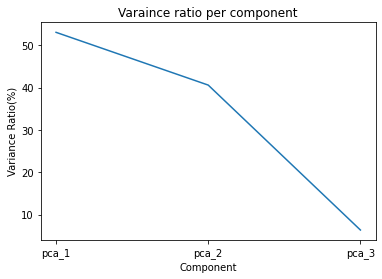

In [ ]:
sns.lineplot(x=pca_x.columns, y=pca_variances).set(title='Varaince ratio per component',\
                                                   xlabel='Component', ylabel='Variance Ratio(%)')

The first two principal components explain approximately 91% of the data, thus, only the first two components will be necessary to achieve 90% of the dataset variation.